# DRAGON Real State - Price Predictor

#### Step1: Find the type of model to build: Supervised, Regression, Batch Learning: We already have data and we are training a model

#### Step2: Selecting a Performance Measure-->  RMSE (Root Mean Squared Error)

#### Step3: Checking the Assumptions : We should need to understand the requirement clearly

#### Step4: Ready for Coding

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing= pd.read_csv("D:\Data Science\Datasets ML\dragon housing data\housingdata.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#We didn't find any missing values in this

In [6]:
# CHAS is a categorical variables. So, we take a quick insight of data.
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288068,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705220,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Count: Ignores null values and from this we are able to understand whether there are missing values or not.
    

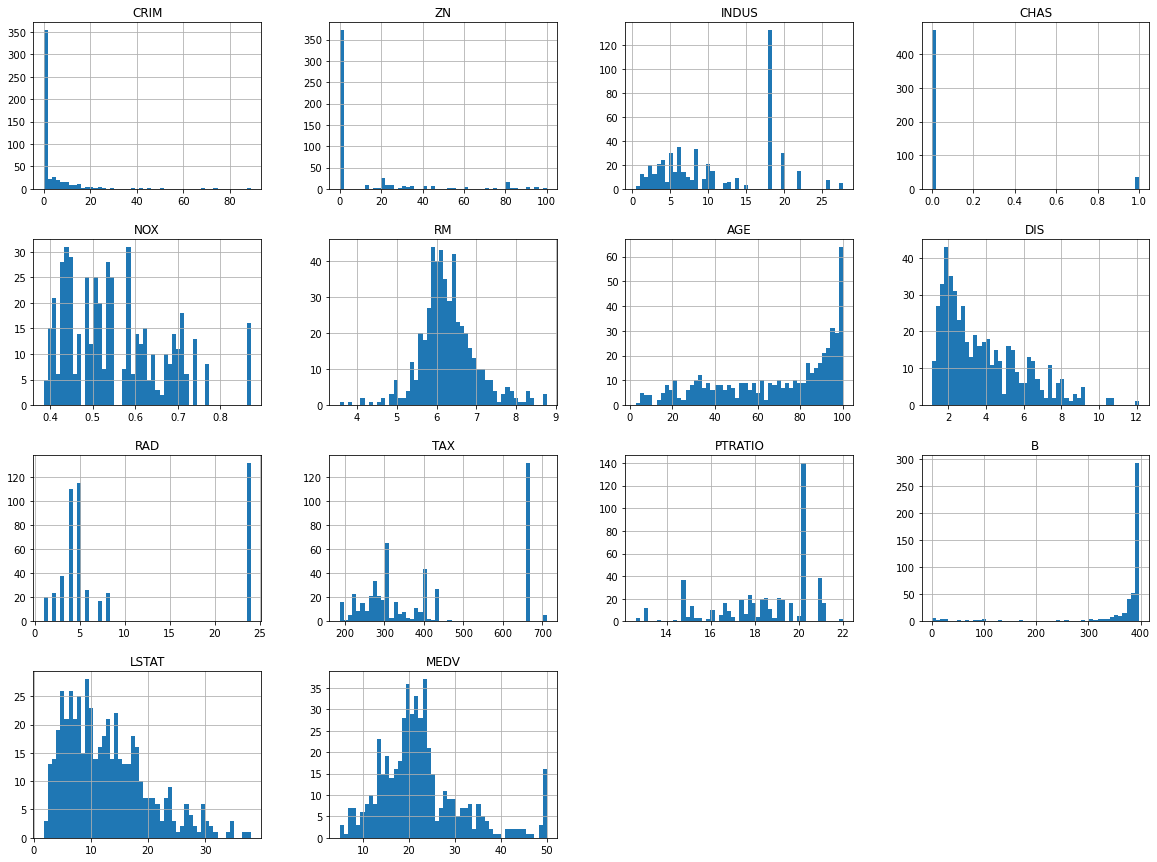

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

#Histogram : Helps to analyse data at a glance
# Age: more than 60 houses have age 100.
# CHAS : 1: Many observations as compared to 0
# MEDV : 

# Train-Test Split

In [9]:

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled= np.random.permutation(len(data))
    #Np.random.permutation fetch random values and we don't want to see all the data points. And we want to put test test aside. 
    # Therefore we set seed(42). So we are able to segregate Test and Train set.(42 is not a rule we can use any number)
    print(shuffled)
    test_set_size= int(len(data)*test_ratio)
    test_indices= shuffled[:test_set_size]
    train_indices= shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set,test_set= split_train_test(housing,0.2)
print("Rows in train set: {0},  Rows in test set: {1}".format(len(train_set), len(test_set)) )

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [11]:
#We do train test split to keep checkon overfitting. 
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [12]:
'''Now there is a problem : We have seen that CHAS value counts 0: 471 and 1: 35 and in this if all the CHAS: ones fall in 
in test set then our model may predict ones wrongly as it never come across with such CHAS: 1 values. So, in order to avoid
such problem we used Startified Sampling. As Stratified Sampling represents the whole population '''

'Now there is a problem : We have seen that CHAS value counts 0: 471 and 1: 35 and in this if all the CHAS: ones fall in \nin test set then our model may predict ones wrongly as it never come across with such CHAS: 1 values. So, in order to avoid\nsuch problem we used Startified Sampling. As Stratified Sampling represents the whole population '

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
housing= strat_train_set.copy()
# We need to do this as wedon't want to see test data.

# Looking for Correlations

In [17]:
corr_matrix=housing.corr()

In [18]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.259668,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.292417,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.385463,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.098933,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.301607,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.259668,0.292417,-0.385463,0.098933,-0.301607,1.000000,-0.246195,0.209166,-0.202730,-0.285436,-0.330173,0.124528,-0.604168,0.680218
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.246195,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.209166,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.202730,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.285436,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [19]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680218
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

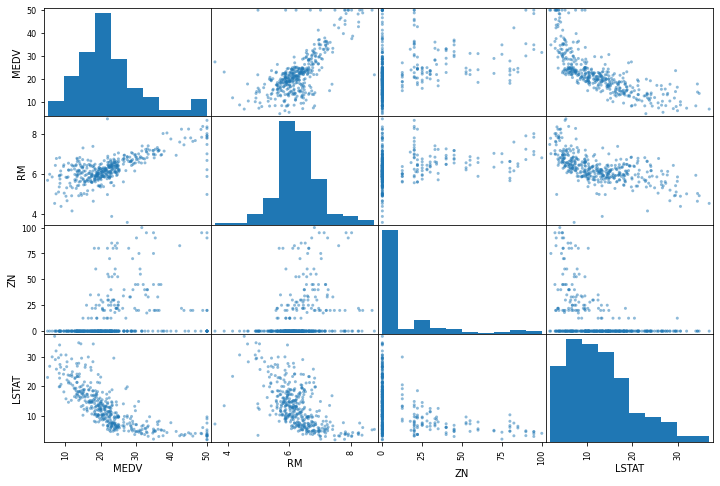

In [20]:
from pandas.plotting import scatter_matrix
attributes= ['MEDV',"RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

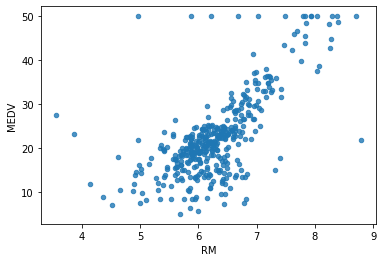

In [21]:
housing.plot(kind='scatter', x="RM", y='MEDV', alpha=0.8)
#From this we can identify outliers and we can remove so our prediction is more accurate.We can observe that there is some
# capping on the price 50. As for rooms =5, Price= 50 and rooms=9, price= 50. So, we can go back to team ask about it. 
# like this we can observe other atributes also. 

# Trying out new Attributes:
#### We can also create new variables by combing 2 variables to predict our model


In [22]:
housing["TAXRM"]= housing['TAX']/housing['RM']

In [23]:
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [24]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680218
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526986
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

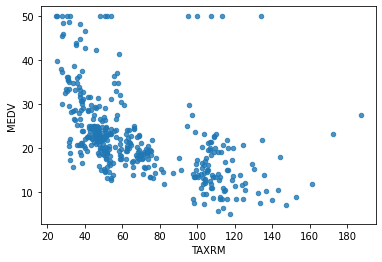

In [25]:
housing.plot(kind='scatter', x="TAXRM", y='MEDV', alpha=0.8)
#Negative Correlation

In [26]:
housing= strat_train_set.drop("MEDV", axis=1)
housing_labels= strat_train_set["MEDV"].copy()
# We are separating Decision from Data.


# Missing Values
#### We are deleting a few values in excel file

To take care of missing attributes, you have three options:
1. Get rid of the missing data points
2. Get rid of the whole attribute
3. Set the value of missing attributes (0.mean or median)

In [27]:
a=housing.dropna(subset=["RM"]) #option1
a.shape

(400, 13)

In [28]:
b=housing.drop("RM", axis=1)
b.shape

(404, 12)

In [29]:
median=housing["RM"].median() #Option 3
median

6.2175

In [30]:
housing["RM"].fillna(median)

#We need to fill this median value in Test data as well as in Train Dataset

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.shape

(404, 13)

In [32]:
housing.describe()
#before we started our imputing (check number of RM values count)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283323,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715657,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Treatment of Missing Values can be done with SKLEARN Imputer Class


In [33]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
#We need to fill median value of respective column in all the missing cells 
X= imputer.transform(housing)

In [36]:
housing_tr= pd.DataFrame(X, columns=housing.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282671,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712127,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# SCIKIT LEARN DESIGN

Primarily, three types of objects
1) Estimators: It estimates some parameters based on a dataset. Eg: imputer. It has a fit and transform method
        Fit: Fits the dataset(computes internal parameters)
        
2) Transformers: Transform method takes input and returns output based on the learnings from fit(). It also has 
    a convenience fuction called fit_transform() which fits and then transforms.
    
3) Predictors: LinearRegression model is an example of a predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions. 

# Feautre Scaling

Primarily, two types of feautre scaling methods:
    
<b>1. Min-Max Scaling(Normalization): value-min/max-min</b>

It will help to scale down our data between 0 to 1
Sklearn provides a class called MinMaxScaler for this

    
<b>2. Standardization: (value-mean)/standard deviation</b>

Sklearn provides a class StandardScaler for this.
By this our data got variance = 1 and mean = 0

## Creating Pipeline

In [38]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler())])

In [39]:
housing_num_tr= my_pipeline.fit_transform(housing)
# We are applying our Pipeline on housing (initial data).

In [40]:
housing_num_tr.shape
# It is a numpy Array (Remeber this is important as we use predictor later. It will use numpy array. 
# So, we don't make any Pandas df

(404, 13)

Working of Pipeline: It takes data and perform fit_tranform of respective process like "imputer.fit_transform()" then it will
give the transformed data to next process and so on. In last process, it only applies fit function and nottransform. So, if we
want to transform the data and get our np.array we apply transform on pipeline.

## Selecting a desired model for Dragon Real Estates

### We first train and evaluate and then select best model

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
Linear_model=LinearRegression()
Linear_model.fit(housing_num_tr, housing_labels)

LinearRegression()

#### Evaluating the Linear Regression Model

In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions =Linear_model.predict(housing_num_tr)
lin_mse= mean_squared_error(housing_labels, housing_predictions)
lin_mse=np.sqrt(lin_mse)

In [43]:
lin_mse

4.828504557343458

### DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor 
Decision_model=DecisionTreeRegressor()
Decision_model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

#### Evaluating the Decision Tree Model

In [66]:
from sklearn.metrics import mean_squared_error
housing_predictions =Decision_model.predict(housing_num_tr)
DT_mse= mean_squared_error(housing_labels, housing_predictions)
DT_mse=np.sqrt(DT_mse)

In [67]:
DT_mse

0.0

### Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor 
RF_model= RandomForestRegressor()
RF_model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [71]:
from sklearn.metrics import mean_squared_error
housing_predictions =RF_model.predict(housing_num_tr)
RF_mse= mean_squared_error(housing_labels, housing_predictions)
RF_mse=np.sqrt(RF_mse)
RF_mse

1.1533256218861212

## Using Better Evaluation Technique- Cross Validation

In [49]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation: ", scores.std())

In [51]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(Linear_model,housing_num_tr,housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_Linear_score= np.sqrt(-scores)
rmse_Linear_score

array([4.22259372, 4.25595254, 5.09754469, 3.83093292, 5.34427133,
       4.37108704, 7.47004509, 5.47746011, 4.15553309, 6.07243723])

In [52]:
print_scores(rmse_Linear_score)

Scores: [4.22259372 4.25595254 5.09754469 3.83093292 5.34427133 4.37108704
 7.47004509 5.47746011 4.15553309 6.07243723]
Mean: 5.029785776734925
Standard deviation:  1.0597980535617884


In [53]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(Decision_model,housing_num_tr,housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_DT_score= np.sqrt(-scores)
rmse_DT_score

array([3.8839884 , 4.04604595, 5.36408563, 3.54246022, 4.12180179,
       3.14157604, 6.86651294, 3.98387374, 3.35055965, 3.43303801])

In [54]:
print_scores(rmse_DT_score)

Scores: [3.8839884  4.04604595 5.36408563 3.54246022 4.12180179 3.14157604
 6.86651294 3.98387374 3.35055965 3.43303801]
Mean: 4.173394237042653
Standard deviation:  1.0722452193933307


In [72]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(RF_model,housing_num_tr,housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_RF_score= np.sqrt(-scores)
rmse_RF_score

array([2.76436866, 2.87093639, 4.48594733, 2.64864734, 3.48840759,
       2.45950791, 4.82336365, 3.33550262, 3.18008185, 3.25964151])

In [73]:
print_scores(rmse_RF_score)

Scores: [2.76436866 2.87093639 4.48594733 2.64864734 3.48840759 2.45950791
 4.82336365 3.33550262 3.18008185 3.25964151]
Mean: 3.3316404846454075
Standard deviation:  0.7329084158827158


## Saving the Model

In [75]:
from joblib import dump, load
dump(RF_model, 'Dragon.joblib')

['Dragon.joblib']

# Testing the model on test data

In [76]:
X_test= strat_test_set.drop("MEDV", axis=1)
Y_test= strat_test_set["MEDV"].copy()
X_test_prepared= my_pipeline.transform(X_test)
final_predictions=RF_model.predict(X_test_prepared)
final_mse= mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [77]:
final_rmse

2.9351203402526274

In [78]:
# Our test data RMSE is less. Our model is very good.

In [79]:
print(final_predictions, list(Y_test))

[24.676 11.443 25.057 21.98  18.847 15.093 19.981 14.189 31.558 41.791
 19.533 11.616 23.733 29.926 19.491 10.93  31.462 14.398 23.835 18.647
 19.744 18.175 17.024 21.871 17.844 31.136 16.267 33.258  8.874 33.626
 23.063 21.344 22.645 10.917 20.895 10.807 43.416 24.565 23.765 41.75
 24.058 30.262 20.894 20.712 18.96  33.795 43.37  20.299 20.241 22.129
 20.918 14.502 21.149 14.928 24.987 33.515 41.423 28.89  19.59  20.986
 46.987  9.82  19.101 25.502 14.508 32.939 19.664 18.221 18.999 33.828
 25.057 22.568 21.248 22.593 34.937 12.931 15.746 19.99  20.965 21.381
 22.28  20.75  13.727 22.704 20.697 21.412 14.656 21.59  21.266 23.095
 18.651 26.677  7.48  26.85  19.534 29.875 19.612 30.546 14.392 26.358
 21.691 20.234] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

# Using the Model


In [86]:
from joblib import dump, load
import numpy as np
model=load("Dragon.joblib")


In [87]:
features=np.array([[-5.43942006,4.12628155,-1.6165014,-0.67288841,-1.42262747,-.23979304,-1.3238722,2.6111401,
                    -1.0016859,-0.577892,-0.97491834,0.41164221,-0.86091034]])
model.predict(features)

array([22.551])